<a href="https://colab.research.google.com/github/sathwikareddy1/DA-using-python/blob/main/DUAP_LAB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("marusagar/bank-customer-attrition-insights")

print("Path to dataset files:", path)

100%|██████████| 307k/307k [00:00<00:00, 62.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/marusagar/bank-customer-attrition-insights/versions/1


In [ ]:
ls/root/.cache/kagglehub/datasets/marusagar/bank-customer-attrition-insights/versions/1

Bank-Customer-Attrition-Insights-Data.csv


In [ ]:

import pandas as pd

df = pd.read_csv("/root/.cache/kagglehub/datasets/marusagar/bank-customer-attrition-insights/versions/1/Bank-Customer-Attrition-Insights-Data.csv")



In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:

import pandas as pd
import numpy as np

# Calculate summary statistics for specified columns
columns = ["Balance", "CreditScore", "NumOfProducts"]
for col in columns:
  print(f"Summary statistics for {col}:")
  print(f"  Mean: {df[col].mean()}")
  print(f"  Median: {df[col].median()}")
  print(f"  Standard Deviation: {df[col].std()}")
  print(f"  Skewness: {df[col].skew()}")
  print(f"  Kurtosis: {df[col].kurt()}")
  print("-" * 30)


Summary statistics for Balance:
  Mean: 76485.889288
  Median: 97198.54000000001
  Standard Deviation: 62397.40520238623
  Skewness: -0.14110871094154384
  Kurtosis: -1.489411767941925
------------------------------
Summary statistics for CreditScore:
  Mean: 650.5288
  Median: 652.0
  Standard Deviation: 96.65329873613061
  Skewness: -0.07160660820092675
  Kurtosis: -0.42572568480291295
------------------------------
Summary statistics for NumOfProducts:
  Mean: 1.5302
  Median: 1.0
  Standard Deviation: 0.5816543579989936
  Skewness: 0.7455678882823168
  Kurtosis: 0.5829807629457178
------------------------------


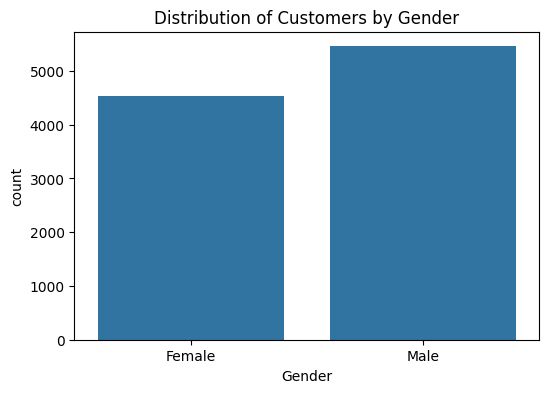

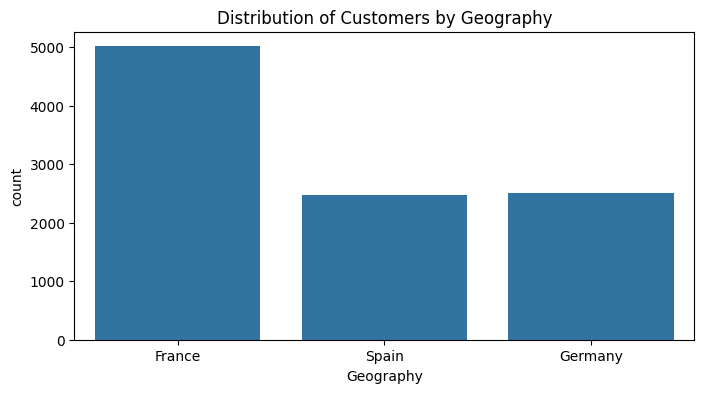

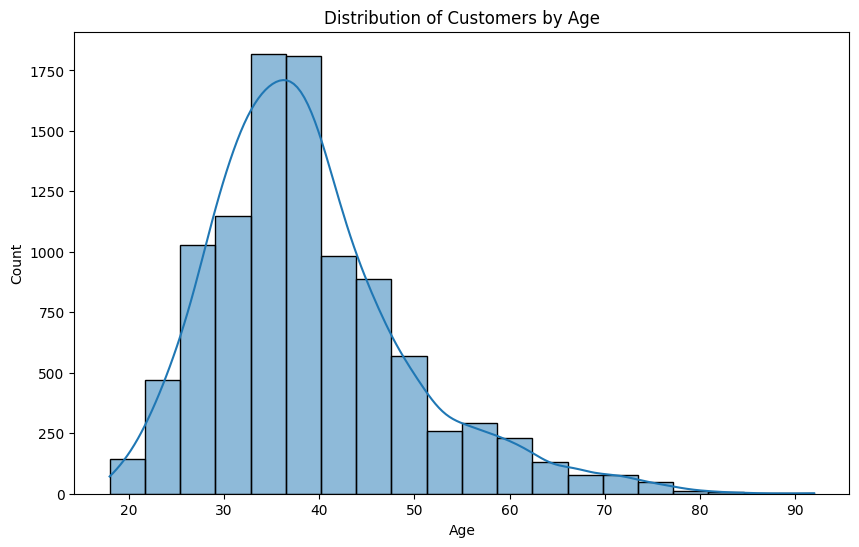

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub


# Distribution of customers by gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Customers by Gender')
plt.show()

# Distribution of customers by geography
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Geography')
plt.title('Distribution of Customers by Geography')
plt.show()

# Distribution of customers by age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Customers by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'IsActiveMember' and calculate transaction counts
transaction_counts = df.groupby('IsActiveMember')['NumOfProducts'].agg(['min', 'max', 'mean'])

# Rename columns for clarity
transaction_counts.rename(columns={'min': 'Min Transactions', 'max': 'Max Transactions', 'mean': 'Avg Transactions'}, inplace=True)

# Display the results
print("Transaction Counts by Customer Activity:")
transaction_counts


Transaction Counts by Customer Activity:


,Min Transactions,Max Transactions,Avg Transactions
IsActiveMember,,,
0,1,4,1.524438
1,1,4,1.535624


Transaction Counts by Customer Activity:
                Min Transactions  Max Transactions  Avg Transactions
IsActiveMember                                                      
0                              1                 4          1.524438
1                              1                 4          1.535624

Correlation Matrix:
               CreditScore   Balance  NumOfProducts
CreditScore       1.000000  0.006268       0.012238
Balance           0.006268  1.000000      -0.304180
NumOfProducts     0.012238 -0.304180       1.000000


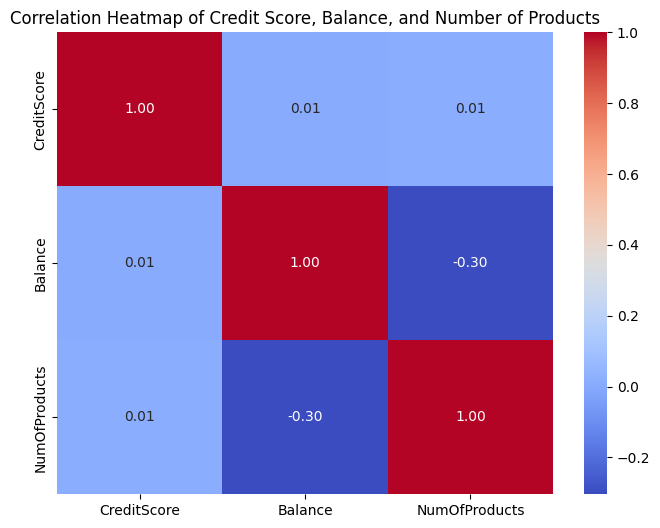

In [ ]:

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Group by 'IsActiveMember' and calculate transaction counts
transaction_counts = df.groupby('IsActiveMember')['NumOfProducts'].agg(['min', 'max', 'mean'])

# Rename columns for clarity
transaction_counts.rename(columns={'min': 'Min Transactions', 'max': 'Max Transactions', 'mean': 'Avg Transactions'}, inplace=True)

# Display the results
print("Transaction Counts by Customer Activity:")
print(transaction_counts)


# Correlation Analysis
correlation_matrix = df[["CreditScore", "Balance", "NumOfProducts"]].corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Credit Score, Balance, and Number of Products")
plt.show()



Average Balance and Transaction Activity by Churn Status:
   Exited   avg_balance  avg_products  avg_credit_score
0       0  72742.750663      1.544210        651.837855
1       1  91109.476006      1.475466        645.414622


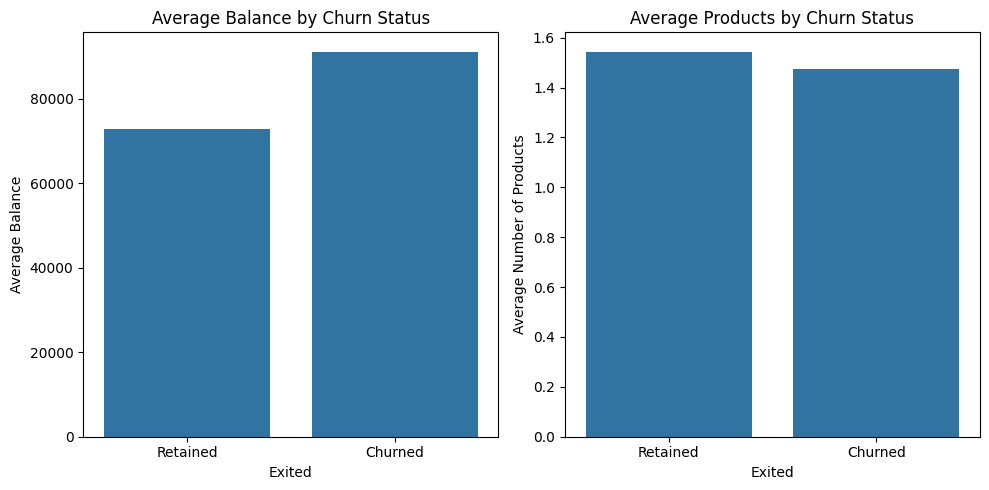

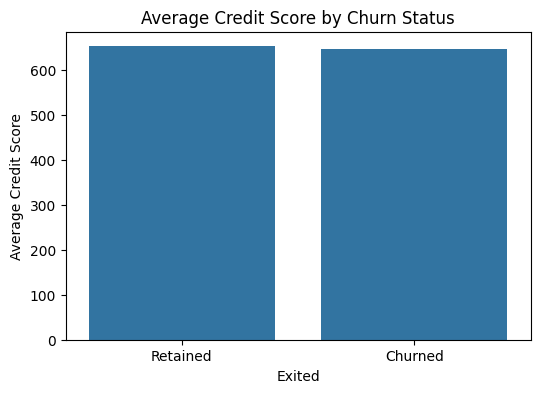

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Analyze balance and transaction activity between churned and retained customers
churn_balance_activity = df.groupby('Exited').agg(
    avg_balance = pd.NamedAgg(column="Balance", aggfunc="mean"),
    avg_products = pd.NamedAgg(column="NumOfProducts", aggfunc="mean"),
    avg_credit_score = pd.NamedAgg(column="CreditScore", aggfunc="mean")
).reset_index()
print("\nAverage Balance and Transaction Activity by Churn Status:")
print(churn_balance_activity)

# Visualize the differences in balance and transaction activity by churn status
plt.figure(figsize=(10, 5))

# Plot average balance
plt.subplot(1, 2, 1)
sns.barplot(x='Exited', y='avg_balance', data=churn_balance_activity)
plt.title('Average Balance by Churn Status')
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.ylabel('Average Balance')

# Plot average number of products
plt.subplot(1, 2, 2)
sns.barplot(x='Exited', y='avg_products', data=churn_balance_activity)
plt.title('Average Products by Churn Status')
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.ylabel('Average Number of Products')


plt.tight_layout()
plt.show()

# Visualize the difference in credit score by churn status
plt.figure(figsize=(6, 4))
sns.barplot(x='Exited', y='avg_credit_score', data=churn_balance_activity)
plt.title('Average Credit Score by Churn Status')
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.ylabel('Average Credit Score')
plt.show()


In [ ]:
low_credit_threshold = df['CreditScore'].quantile(0.25)
high_balance_threshold = df['Balance'].quantile(0.75)

# Filter the DataFrame for customers with low credit score and high balance
low_credit_high_balance = df[(df['CreditScore'] <= low_credit_threshold) & (df['Balance'] >= high_balance_threshold)]

# Calculate the probability
probability = len(low_credit_high_balance) / len(df)

print(f"Probability of having both a low credit score and a high balance: {probability:.4f}")


Probability of having both a low credit score and a high balance: 0.0638
